# Toolkit

In [54]:
import pandas as pd
import numpy as np

import seaborn as sns

from datasist.structdata import detect_outliers

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import (r2_score, classification_report, accuracy_score,
confusion_matrix, recall_score, precision_score, precision_recall_curve, f1_score, fbeta_score)

import joblib


# Import and Inspect data

In [4]:
df = pd.read_csv(r"Data/data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8611,0,home_improvement,0.1071,202.13,11.152673,10.63,697,3900.0,5031,59.2,4,0,0,1
1893,1,all_other,0.1505,260.19,11.379394,9.08,667,6930.0,55163,93.7,0,0,0,0
6009,1,debt_consolidation,0.1218,807.53,11.579883,17.65,742,9360.0,81940,35.3,0,0,0,0
3237,1,educational,0.0932,151.75,9.740969,18.28,737,2430.0,842,6.4,2,0,0,0
7223,1,debt_consolidation,0.1311,330.70,10.404263,8.25,687,6635.0,5745,18.4,2,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Preprocessing

### Duplicates

In [7]:
df.duplicated().sum()

0

### Nulls

In [8]:
# percentage
(df.isna().sum()/df.shape[0])*100

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [9]:
df.columns 

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# EDA

In [10]:
# I don't like the way it's called so i'm going to rename then exchange numbers
df.rename(columns={'not.fully.paid': 'fully.paid'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  fully.paid         9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
df['fully.paid'] = df['fully.paid'].replace({0: 1, 1: 0})

<Axes: xlabel='fully.paid', ylabel='Count'>

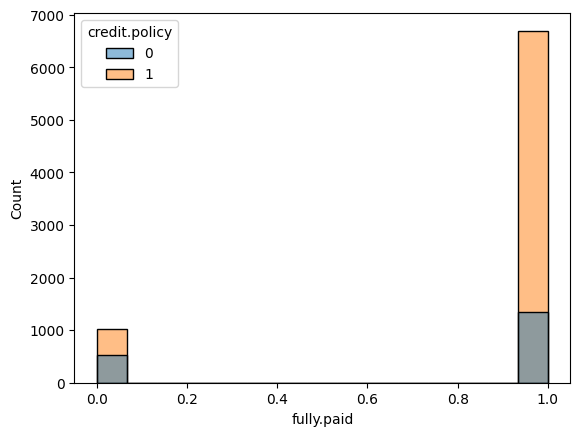

In [13]:
sns.histplot(data=df, x='fully.paid', hue='credit.policy')

In [14]:
df.groupby('fully.paid')['credit.policy'].describe()

,count,mean,std,min,25%,50%,75%,max
fully.paid,,,,,,,,
0,1533.0,0.661448,0.473372,0.0,0.0,1.0,1.0,1.0
1,8045.0,0.832318,0.373607,0.0,1.0,1.0,1.0,1.0


<Axes: xlabel='count', ylabel='purpose'>

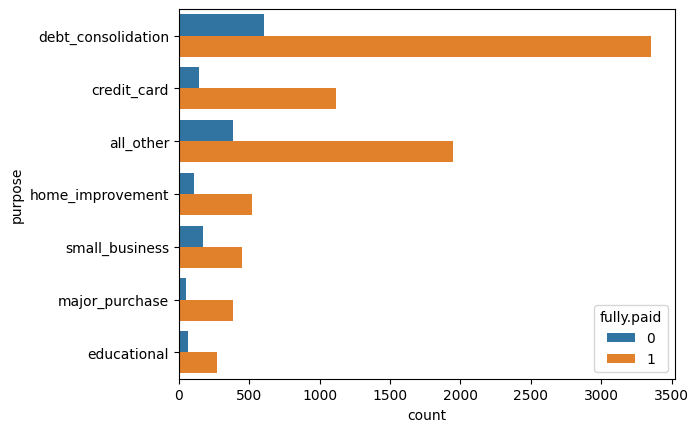

In [15]:
sns.countplot(data=df, y='purpose', hue='fully.paid')

In [16]:
# These are stats for who paid
df_2=df.groupby('purpose')['fully.paid'].mean().reset_index()
df_2

,purpose,fully.paid
0,all_other,0.833977
1,credit_card,0.884311
2,debt_consolidation,0.847612
3,educational,0.798834
4,home_improvement,0.829889
5,major_purchase,0.887872
6,small_business,0.722132


<Axes: xlabel='fully.paid', ylabel='purpose'>

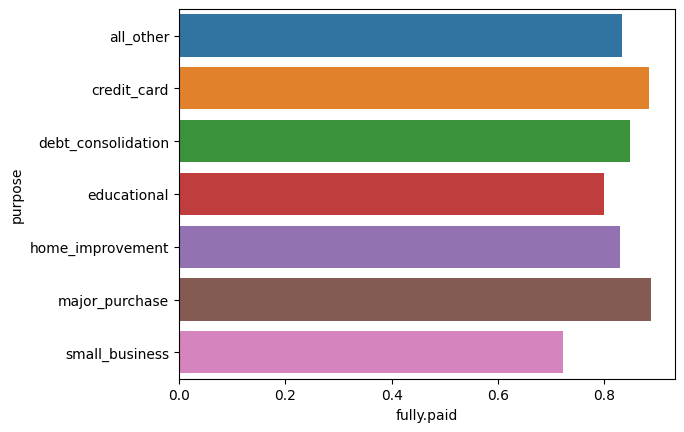

In [17]:
sns.barplot(data=df_2,y='purpose',x='fully.paid')

<Axes: xlabel='fully.paid', ylabel='log.annual.inc'>

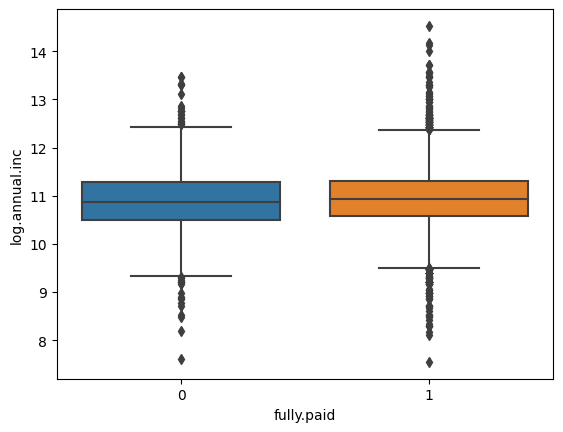

In [18]:
sns.boxplot(data=df, y='log.annual.inc', x='fully.paid')

<Axes: xlabel='fully.paid', ylabel='int.rate'>

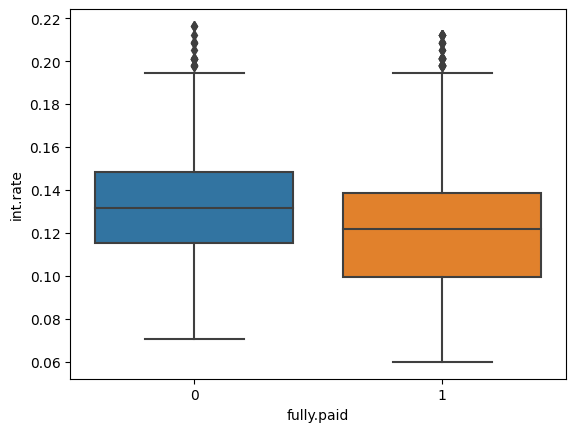

In [19]:
sns.boxplot(data=df, y='int.rate', x='fully.paid')

<Axes: xlabel='fully.paid', ylabel='installment'>

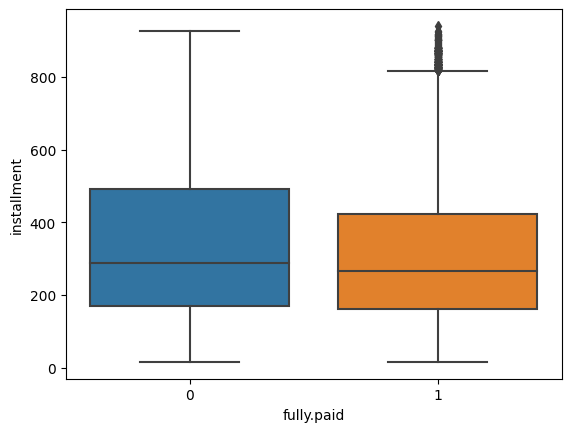

In [20]:
sns.boxplot(data=df, y='installment', x='fully.paid')

<Axes: xlabel='fully.paid', ylabel='dti'>

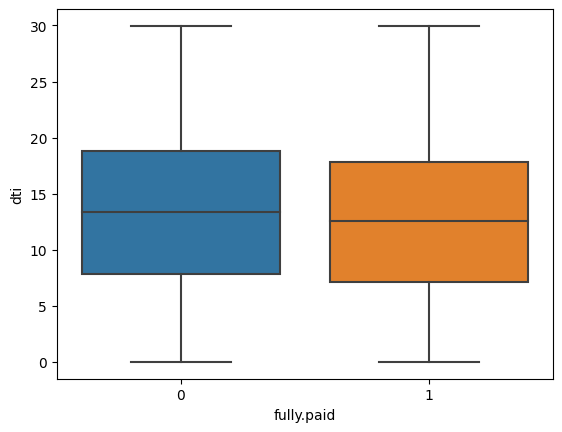

In [21]:
sns.boxplot(data=df, y='dti', x='fully.paid')

In [22]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'fully.paid'],
      dtype='object')

In [23]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0


# Outliers

In [24]:
indices = detect_outliers(df, 0, ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util'])
(len(indices)/df.shape[0])*100

14.825642096471078

In [25]:
df.drop(indices, axis=0, inplace=True)

# Encoding

In [26]:
df=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,0,0,0,0,0,0,0
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,0,0,1,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8158 entries, 0 to 9576
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               8158 non-null   int64  
 1   int.rate                    8158 non-null   float64
 2   installment                 8158 non-null   float64
 3   log.annual.inc              8158 non-null   float64
 4   dti                         8158 non-null   float64
 5   fico                        8158 non-null   int64  
 6   days.with.cr.line           8158 non-null   float64
 7   revol.bal                   8158 non-null   int64  
 8   revol.util                  8158 non-null   float64
 9   inq.last.6mths              8158 non-null   int64  
 10  delinq.2yrs                 8158 non-null   int64  
 11  pub.rec                     8158 non-null   int64  
 12  fully.paid                  8158 non-null   int64  
 13  purpose_credit_card         8158 

# Split

In [28]:
x = df.drop('fully.paid',axis=1)
y = df['fully.paid']

# Imbalance

In [29]:
sampler = RandomUnderSampler()

In [30]:
x, y = sampler.fit_resample(x,y)

In [31]:
y.value_counts()

0    1240
1    1240
Name: fully.paid, dtype: int64

# Scaling

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

In [59]:
models={'LogisticRegression' : LogisticRegression(),
        'KNN'                : KNeighborsClassifier(n_neighbors=5),
        # 'SVC'                : SVC(),
        'Naive'              : GaussianNB(),
        'DTree'              : DecisionTreeClassifier(),
        'RF'                 : RandomForestClassifier(n_estimators=20, n_jobs=-1)} # -1 all cores

In [60]:
for name ,model in models.items():
    print('--------- ', name,'-------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print( 'accuracy   :', accuracy_score(y_pred=y_pred, y_true=y_test))
    print(f"train score: {model.score(x_train, y_train)}")
    print(f"test score : {model.score(x_test, y_test)}")
    # print('confusion matrix: ', confusion_matrix(y_pred=y_pred, y_true=y_test))
    # print('recall score:     ', recall_score(y_pred=y_pred, y_true=y_test))
    # print('precision score:  ', precision_score(y_pred=y_pred, y_true=y_test))
    print('_'*50)
    # print("classification report:\n", classification_report(y_test, y_pred))
    # print('#'*100)

---------  LogisticRegression -------------
accuracy   : 0.6387096774193548
train score: 0.6435483870967742
test score : 0.6387096774193548
__________________________________________________
---------  KNN -------------
accuracy   : 0.5806451612903226
train score: 0.7225806451612903
test score : 0.5806451612903226
__________________________________________________
---------  Naive -------------
accuracy   : 0.6209677419354839
train score: 0.6053763440860215
test score : 0.6209677419354839
__________________________________________________
---------  DTree -------------
accuracy   : 0.55
train score: 1.0
test score : 0.55
__________________________________________________
---------  RF -------------
accuracy   : 0.5983870967741935
train score: 0.9951612903225806
test score : 0.5983870967741935
__________________________________________________
